In [1]:
import pandas as pd
import plotly.offline as py 
import plotly.graph_objs as go
import numpy as np

In [65]:
df = pd.read_csv('data.csv')
df.head()

,Tipo,Pais,Fuente,Texto,FechaPublicacion,sentimiento,sentimiento_numerico
0,Excelencia Operativa,Colombia,Apps,Muy mala la app como una hora pidiendo un Códi...,2021-10-22 16:22:53,Negativo,0.00
1,Excelencia Operativa,Colombia,Apps,Un poquito lenta pero excelente,2021-10-22 16:03:49,Positivo,0.94
2,Excelencia Operativa,Colombia,Apps,"Que aplicacion tan mala, con tanto que roban d...",2021-10-22 15:13:42,Negativo,0.00
3,Excelencia Operativa,Colombia,Apps,"Muy lenta, se nota lo pesada... Debe ser mas i...",2021-10-22 14:56:23,Negativo,0.00
4,Excelencia Operativa,Colombia,Apps,Muy buena lo mejor que han podido crear,2021-10-22 14:48:38,Positivo,0.55


In [66]:
fechas = df['FechaPublicacion']
fechas2 = []

for i in fechas:
    fechas2.append(i[0:10])

df['FechaPublicacion'] = fechas2

df['FechaPublicacion'] = pd.to_datetime(df['FechaPublicacion'], format="%Y/%m/%d")

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6907 entries, 0 to 6906
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Tipo                  6907 non-null   object        
 1   Pais                  6907 non-null   object        
 2   Fuente                6907 non-null   object        
 3   Texto                 6907 non-null   object        
 4   FechaPublicacion      6907 non-null   datetime64[ns]
 5   sentimiento           6907 non-null   object        
 6   sentimiento_numerico  6907 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 377.9+ KB


In [68]:
df_Col = df[df['Pais']=='España']
df_Col

,Tipo,Pais,Fuente,Texto,FechaPublicacion,sentimiento,sentimiento_numerico
440,Excelencia Operativa,España,Apps,Únicamente me incomoda el uso de la tarjeta de...,2021-10-22,Negativo,0.00
441,Excelencia Operativa,España,Apps,Estupenda,2021-10-22,Positivo,0.89
442,Excelencia Operativa,España,Apps,Muy buena,2021-10-22,Positivo,0.97
443,Excelencia Operativa,España,Apps,Es genial lo recomiendo,2021-10-22,Positivo,0.99
444,Excelencia Operativa,España,Apps,Buena aplicación. Muy útil para hacer un segui...,2021-10-22,Positivo,0.85
...,...,...,...,...,...,...,...
6136,Futuro sostenible,España,Twitter,@LargaSpcv @GMi15f @pablocasado_ @LourdesArast...,2021-10-14,Negativo,0.00
6137,Futuro sostenible,España,Twitter,Por ahí pasan autos cerca de mi casa y se retu...,2021-10-14,Negativo,0.00
6138,Futuro sostenible,España,Twitter,"Cuando los autos eran autos, quien pudiera ten...",2021-10-14,Negativo,0.01
6139,Futuro sostenible,España,Twitter,El Fairlane Club expuso autos clásicos en la P...,2021-10-14,Positivo,1.00


In [69]:
import json, re
import pandas as pd 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import ToktokTokenizer

In [70]:
def limpiar_texto(texto):
    """
    Función para realizar la limpieza de un texto dado.
    """
    # Eliminamos los caracteres especiales
    texto = re.sub(r'\W', ' ', str(texto))
    # Eliminado las palabras que tengo un solo caracter
    texto = re.sub(r'\s+[a-zA-Z]\s+', ' ', texto)
    texto = re.sub(r'\s+[co]\s+', ' ', texto)
    texto = re.sub(r'\s+[https]\s+', ' ', texto)
    # Sustituir los espacios en blanco en uno solo
    texto = re.sub(r'\s+', ' ', texto, flags=re.I)
    # Convertimos textos a minusculas
    texto = texto.lower()
    return texto

df_Col["Texto"] = df_Col.Texto.apply(limpiar_texto)
df_Col.head()

<ipython-input-70-2a1e19e479d3>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Tipo,Pais,Fuente,Texto,FechaPublicacion,sentimiento,sentimiento_numerico
440,Excelencia Operativa,España,Apps,únicamente me incomoda el uso de la tarjeta de...,2021-10-22,Negativo,0.00
441,Excelencia Operativa,España,Apps,estupenda,2021-10-22,Positivo,0.89
442,Excelencia Operativa,España,Apps,muy buena,2021-10-22,Positivo,0.97
443,Excelencia Operativa,España,Apps,es genial lo recomiendo,2021-10-22,Positivo,0.99
444,Excelencia Operativa,España,Apps,buena aplicación muy útil para hacer un seguim...,2021-10-22,Positivo,0.85


In [71]:
tokenizer = ToktokTokenizer() 
df_Col["Texto"] = df_Col.Texto.apply(tokenizer.tokenize)
df_Col.head()

<ipython-input-71-3f261cba1eac>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Tipo,Pais,Fuente,Texto,FechaPublicacion,sentimiento,sentimiento_numerico
440,Excelencia Operativa,España,Apps,"[únicamente, me, incomoda, el, uso, de, la, ta...",2021-10-22,Negativo,0.00
441,Excelencia Operativa,España,Apps,[estupenda],2021-10-22,Positivo,0.89
442,Excelencia Operativa,España,Apps,"[muy, buena]",2021-10-22,Positivo,0.97
443,Excelencia Operativa,España,Apps,"[es, genial, lo, recomiendo]",2021-10-22,Positivo,0.99
444,Excelencia Operativa,España,Apps,"[buena, aplicación, muy, útil, para, hacer, un...",2021-10-22,Positivo,0.85


In [72]:
STOPWORDS = set(stopwords.words("spanish"))

def filtrar_stopword_digitos(tokens):
    """
    Filtra stopwords y digitos de una lista de tokens.
    """

    
    return [token for token in tokens if token not in STOPWORDS 
            and not token.isdigit()]

df_Col["Texto"] = df_Col.Texto.apply(filtrar_stopword_digitos)
df_Col.head()

<ipython-input-72-bd464796af6a>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Tipo,Pais,Fuente,Texto,FechaPublicacion,sentimiento,sentimiento_numerico
440,Excelencia Operativa,España,Apps,"[únicamente, incomoda, uso, tarjeta, móvil, ap...",2021-10-22,Negativo,0.00
441,Excelencia Operativa,España,Apps,[estupenda],2021-10-22,Positivo,0.89
442,Excelencia Operativa,España,Apps,[buena],2021-10-22,Positivo,0.97
443,Excelencia Operativa,España,Apps,"[genial, recomiendo]",2021-10-22,Positivo,0.99
444,Excelencia Operativa,España,Apps,"[buena, aplicación, útil, hacer, seguimiento, ...",2021-10-22,Positivo,0.85


In [73]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from collections import Counter

In [74]:
wc = WordCloud()

In [88]:
text = df_Col['Texto'].values 


#words_list = text.split(' ')

stopwords = ["https'", "co'", "list'"]

words_without_stopwords = [ word for word in text if word not in stopwords ]



wordcloud = WordCloud().generate(str(words_without_stopwords))
words_counter = Counter(str(words_without_stopwords))

In [125]:
text = "banco banco santander cupo para crédito problema aplicación problema aplicación problema mala mala aplicación aplicación Mexico Mexico Mexico mala aplicación en bbva bbva_Mexico aplicación aplicación mala mala mala únicamente incomoda uso tarjeta  seguridad ambiente ambiente encuentro solucion aplica móvil resulta util para pagos no se puede pagar nunca por culpa de  banco"

In [126]:
text

'banco banco santander cupo para crédito problema aplicación problema aplicación problema mala mala aplicación aplicación Mexico Mexico Mexico mala aplicación en bbva bbva_Mexico aplicación aplicación mala mala mala únicamente incomoda uso tarjeta  seguridad ambiente ambiente encuentro solucion aplica móvil resulta util para pagos no se puede pagar nunca por culpa de  banco'

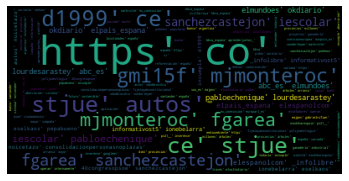

In [127]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

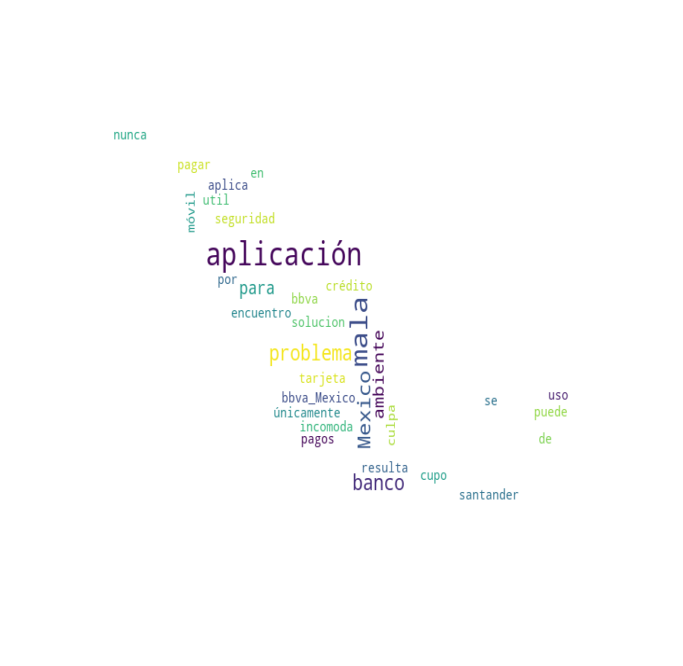

In [128]:
custom_mask = np.array(Image.open("Mex.jpg"))
wc = WordCloud(background_color="white", mask=custom_mask)
wc.generate(str(text))
image_colors = ImageColorGenerator(custom_mask)
#wc.recolor(color_func=image_colors)
plt.figure(figsize = (12,12))
plt.imshow(wc, interpolation='bilinear', aspect='auto')
plt.axis("off")
plt.show()